In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
import ipywidgets as widgets
from ipywidgets import interact
import seaborn as sns
import numpy as np
import pandas as pd

In [ ]:
# Function to generate and plot the data
def generate_moons(N, noise):
    # Generate the data
    X, y = make_regression(n_samples=N,n_features=2, n_informative=2,
                           noise=noise,
                      random_state=42)
    return X, y

def plot_moons(N, noise):
    # Generate the data
    X, y = generate_moons(N, noise)
    # Create a figure
    plt.figure(figsize=(10, 4))
    # Create a scatter plot
    plt.scatter(X[:, 0], X[:, 1], c='g', cmap='plasma')
    plt.title(' Data Set')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.grid(True)
    # Show the plot
    plt.show()

# Create interactive widgets
N_slider = widgets.IntSlider(value=110, min=50, max=250, step=25, description='N')
noise_slider = widgets.FloatSlider(value=0.15, min=0, max=1, step=0.05, description='Noise')

# Use interact to create an interactive plot
interact(plot_moons, N=N_slider, noise=noise_slider)

# Extract dataset for future use
N_value = 50 # or any value you want
noise_value = 0.15  # or any value you want
X, y = generate_moons(N=N_value, noise=noise_value)

# Now X_final and y_final can be used for further processing outside the function


interactive(children=(IntSlider(value=110, description='N', max=250, min=50, step=25), FloatSlider(value=0.15,…

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state=10,
                                                    test_size=5)
X_train.shape, X_test.shape

((45, 2), (5, 2))

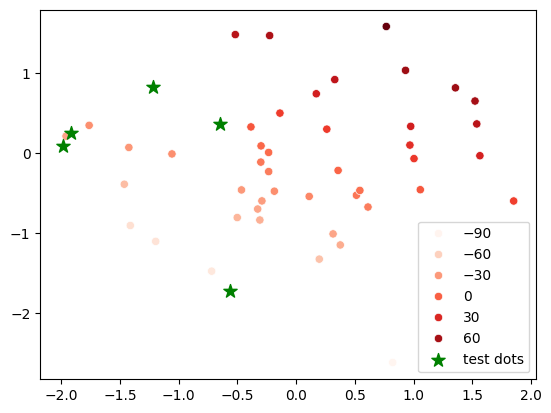

In [ ]:
# Create color maps
cmap_bold = ["darkorange", "darkblue"]

sns.scatterplot(
    x=X_train[:, 0],
    y=X_train[:, 1],
    hue=y_train,
    palette='Reds',  # Set the color to green
    marker='o'  # Optional: Choose the marker style
)

plt.scatter(X_test[:, 0], X_test[:, 1],
            c='g',
            marker='*',
            s=100,
            label='test dots')
plt.legend();

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

n_neighbors = 3
model = KNeighborsRegressor(n_neighbors=n_neighbors)

In [ ]:
model.fit(X_train, y_train)
pred_test = model.predict(X_test)

array([-25.76840246, -29.36986964, -29.36986964,   6.50903373,
       -67.16553512])

array([  7.33082864, -32.35704459, -40.11919079,   0.64898399,
       -84.49998037])

In [ ]:
# Create a DataFrame with two columns: 'Predicted' and 'Actual'
results_df = pd.DataFrame({
    'Predicted': pred_test,
    'Actual': y_test
})

# Display the DataFrame
display(results_df)


,Predicted,Actual
0,-25.768402,7.330829
1,-29.369870,-32.357045
2,-29.369870,-40.119191
3,6.509034,0.648984
4,-67.165535,-84.499980


In [ ]:
idx = 0
test_dot = X_test[idx]
distances_list=[]
# Loop through the training data
for i, train_dot in enumerate(X_train):
    # Calculate the distance and store it in the list
    distances_list.append({
        'train_idx': i,
        'dst': np.linalg.norm(train_dot - test_dot, ord=2)
    })

# Convert the list of dictionaries to a DataFrame
distances = pd.DataFrame(distances_list)
distances

,train_idx,dst
0,0,1.663154
1,1,2.392720
2,2,1.130550
3,3,1.699639
4,4,1.179296
5,5,0.960777
6,6,0.960453
7,7,1.782518
8,8,2.577103
9,9,1.572624


In [ ]:
distances.sort_values('dst').head(n_neighbors)

,train_idx,dst
27,27,0.723428
13,13,0.782066
10,10,0.851809


In [ ]:
nearest_neigbors_idxs = distances.sort_values('dst').head(n_neighbors).index
nearest_neigbors_idxs

Index([27, 13, 10], dtype='int64')

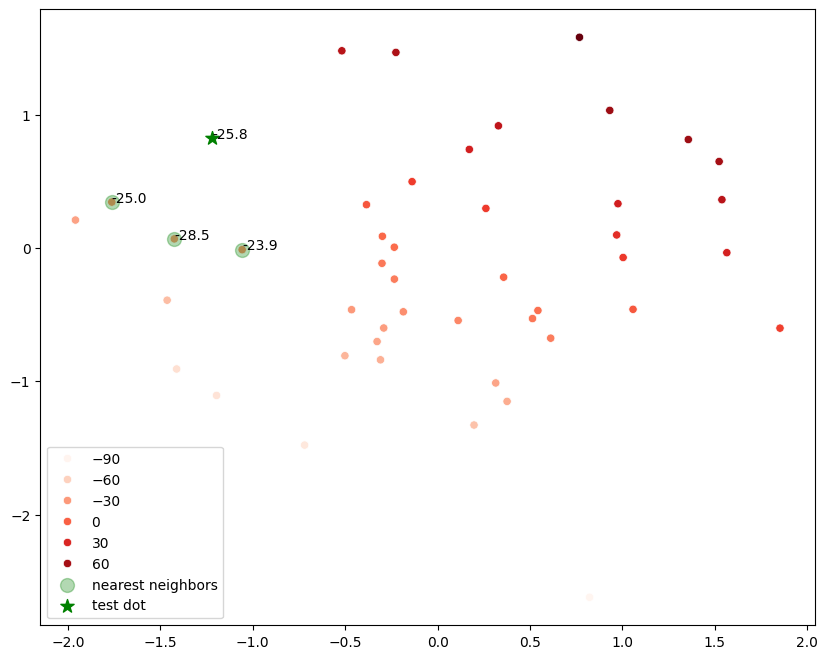

In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=X_train[:, 0],
    y=X_train[:, 1],
    hue=y_train,
    palette='Reds',  # Set the color to green
    marker='o'  # Optional: Choose the marker style
)

plt.scatter(X_train[nearest_neigbors_idxs, 0], X_train[nearest_neigbors_idxs, 1],
            c='g', alpha=0.3, marker='o', s=100, label='nearest neighbors')

pred = np.mean(y_train[nearest_neigbors_idxs])
plt.scatter(X_test[idx, 0], X_test[idx, 1], c='g', marker='*', s=100, label='test dot')
plt.annotate(round(pred, 1), (X_test[idx, 0], X_test[idx, 1]))

for i, txt in enumerate(y_train[nearest_neigbors_idxs]):
    plt.annotate(round(txt, 1), (X_train[nearest_neigbors_idxs[i], 0], X_train[nearest_neigbors_idxs[i], 1]))

plt.legend();

In [ ]:
((-25)-28.5-23.9)/3


-25.8

weights{‘uniform’, ‘distance’}, callable or None, default=’uniform’
Weight function used in prediction. Possible values:

‘uniform’ : uniform weights. All points in each neighborhood are weighted equally.

‘distance’ : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.



In [53]:
from sklearn.neighbors import KNeighborsRegressor
help(KNeighborsRegressor)


Help on class KNeighborsRegressor in module sklearn.neighbors._regression:

class KNeighborsRegressor(sklearn.neighbors._base.KNeighborsMixin, sklearn.base.RegressorMixin, sklearn.neighbors._base.NeighborsBase)
 |  KNeighborsRegressor(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)
 |  
 |  Regression based on k-nearest neighbors.
 |  
 |  The target is predicted by local interpolation of the targets
 |  associated of the nearest neighbors in the training set.
 |  
 |  Read more in the :ref:`User Guide <regression>`.
 |  
 |  .. versionadded:: 0.9
 |  
 |  Parameters
 |  ----------
 |  n_neighbors : int, default=5
 |      Number of neighbors to use by default for :meth:`kneighbors` queries.
 |  
 |  weights : {'uniform', 'distance'}, callable or None, default='uniform'
 |      Weight function used in prediction.  Possible values:
 |  
 |      - 'uniform' : uniform weights.  All points in each neighborhood
 |